<a href="https://colab.research.google.com/github/shinchangyoung/LibraryWeb/blob/main/%EC%82%B0%EC%A0%90%EB%8F%84_%EA%B7%B8%EB%9E%98%ED%94%84%ED%99%95%EC%9D%B8%ED%9B%84_%EC%9D%B4%EC%83%81%EC%B9%98_%EC%82%AD%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/역_버스정류장_위치_정보 (4).csv', encoding='cp949')

In [ ]:
latitudes = data['위도'].to_numpy()
longitudes = data['경도'].to_numpy()
coords = np.vstack((latitudes, longitudes)).T

mean_lat = latitudes.mean()
lat_km = coords[:, 0]
lon_km = coords[:, 1]  #* np.cos(np.radians(mean_lat))
coords_km = np.vstack((lat_km, lon_km)).T
coords_km=pd.DataFrame(coords_km) # coords_km= 좌표를 km로 변환한 데이터
#coords_km.to_csv('좌표데이터_최종.csv')

In [ ]:
import pandas as pd
import numpy as np
import math
from sklearn.cluster import KMeans

file = pd.read_csv('/content/drive/MyDrive/역_버스정류장_위치_정보 (4).csv',encoding='cp949')

latitudes = file['위도'].to_numpy()
longitudes = file['경도'].to_numpy()
coords = np.vstack((latitudes, longitudes)).T

mean_lat = latitudes.mean()
lat_km = coords[:, 0] * 111.0
lon_km = coords[:, 1] * 111.0 * np.cos(np.radians(mean_lat))

coords_km = np.vstack((lat_km, lon_km)).T
coords_km
#------------------------------------------------------------------------------
from sklearn.cluster import KMeans
k = 2550
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(coords_km)
centers = kmeans.cluster_centers_

file['클러스터'] = labels

output_path = '군집화_결과.csv'
#file.to_csv(output_path, index=False, encoding='utf-8-sig')

centers_lat_deg = centers[:, 0] / 111.0
centers_lon_deg = centers[:, 1] / (111.0 * np.cos(np.radians(mean_lat)))
centroids_df = pd.DataFrame({
    '클러스터': np.arange(k),
    '위도': centers_lat_deg,
    '경도': centers_lon_deg
})
last=centroids_df
#centroids_df.to_csv('군집화_결과(위도_경도)_최종.csv', index=False, encoding='utf-8-sig')
main=file

In [ ]:
main = main.drop_duplicates(subset='이름', keep='first').reset_index(drop=True)

# 원본 데이터 확인

In [ ]:
main

,이름,위도,경도,type,클러스터
0,종로2가사거리,37.569806,126.987752,bus,376
1,창경궁.서울대학교병원,37.579433,126.996521,bus,779
2,명륜3가.성대입구,37.582580,126.998251,bus,439
3,종로2가.삼일교,37.568579,126.987613,bus,2111
4,혜화동로터리.여운형활동터,37.586243,127.001744,bus,1895
...,...,...,...,...,...
7472,산성,37.456886,127.149927,subway,958
7473,단대오거리,37.445057,127.156735,subway,1278
7474,신흥,37.440952,127.147590,subway,1103
7475,수진,37.437575,127.140936,subway,149


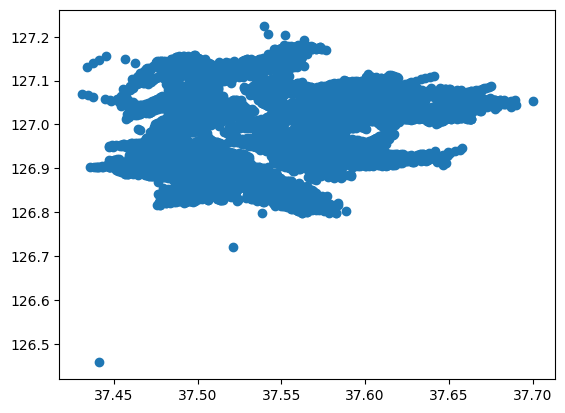

In [ ]:
plt.scatter(main['위도'], main['경도'])

# 이상치 조회

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


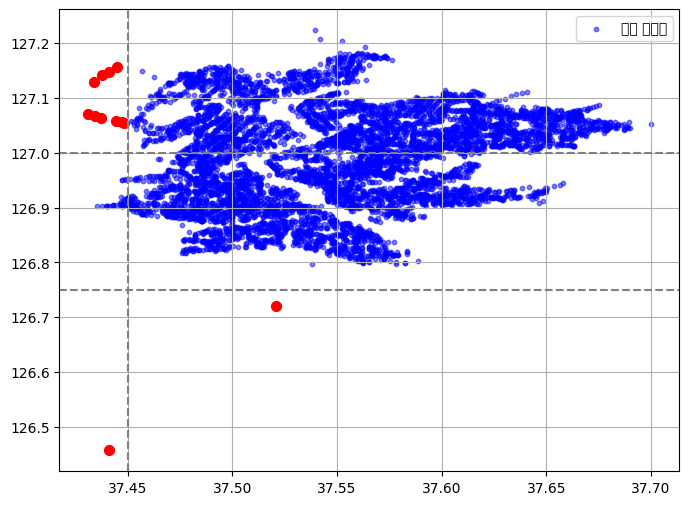

이상치 (조건1: 경도 < 126.75):
             위도          경도
2215  37.440965  126.457230
5317  37.520861  126.721031

이상치 (조건2: 위도 < 37.45 & 경도 > 127.0):
             위도          경도
6023  37.444453  127.057701
6024  37.437321  127.063239
6025  37.434513  127.066179
6026  37.430947  127.070438
6058  37.448451  127.054446
6059  37.447572  127.055573
7473  37.445057  127.156735
7474  37.440952  127.147590
7475  37.437575  127.140936
7476  37.433888  127.129921


In [ ]:
import matplotlib.pyplot as plt

# 이상치 조건 설정
outliers = main[main['경도'] < 126.75]
outliers_2 = main[(main['위도'] < 37.45) & (main['경도'] > 127.0)]

# 전체 산점도
plt.figure(figsize=(8, 6))
plt.scatter(main['위도'], main['경도'], s=10, c='blue', alpha=0.5, label='정상 데이터')

# 이상치 빨간색 표시
plt.scatter(outliers['위도'], outliers['경도'], s=50, c='red')
plt.scatter(outliers_2['위도'], outliers_2['경도'], s=50, c='red')

# 기준선 추가
plt.axhline(y=126.75, color='gray', linestyle='--')  # 수평선 (경도 기준)
plt.axvline(x=37.45, color='gray', linestyle='--')   # 수직선 (위도 기준)
plt.axhline(y=127.0, color='gray', linestyle='--')   # 수평선 (경도 기준)

plt.grid(True)
plt.legend()
plt.show()

# 이상치 데이터 출력
print("이상치 (조건1: 경도 < 126.75):")
print(outliers[['위도', '경도']])

print("\n이상치 (조건2: 위도 < 37.45 & 경도 > 127.0):")
print(outliers_2[['위도', '경도']])


# 이상치 제거

In [ ]:
# coords_km 이상치 인덱스만 추출
outlier_indices = outliers.index.tolist()
outlier_indices_2 = outliers_2.index.tolist()

# 두 조건 이상치 인덱스 합치기
all_outlier_indices = list(set(outlier_indices + outlier_indices_2))

# data와 coords_km가 같은 인덱스를 공유한다고 가정
main_cleaned = main.drop(index=all_outlier_indices)

coords_km_cleaned = main.drop(index=all_outlier_indices)


print(f"원본 데이터 크기: {len(main)}")
print(f"이상치 삭제 후 크기: {len(main_cleaned)}")


원본 데이터 크기: 7477
이상치 삭제 후 크기: 7465


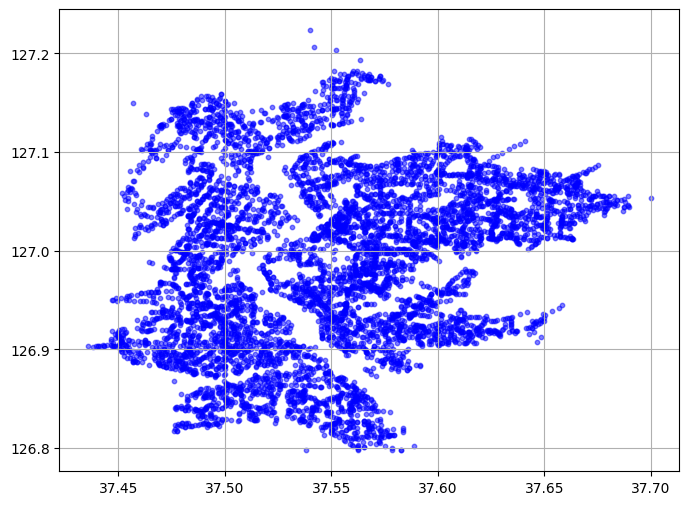

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(coords_km_cleaned['위도'], coords_km_cleaned['경도'], s=10, c='blue', alpha=0.5)
plt.grid(True)
plt.show()

In [ ]:
#이상치 2 제거후 데이터셋
main_cleaned

,이름,위도,경도,type,클러스터
0,종로2가사거리,37.569806,126.987752,bus,376
1,창경궁.서울대학교병원,37.579433,126.996521,bus,779
2,명륜3가.성대입구,37.582580,126.998251,bus,439
3,종로2가.삼일교,37.568579,126.987613,bus,2111
4,혜화동로터리.여운형활동터,37.586243,127.001744,bus,1895
...,...,...,...,...,...
7468,문정,37.485931,127.122473,subway,1275
7469,장지,37.478609,127.126229,subway,654
7470,복정,37.471016,127.126746,subway,2234
7471,남위례,37.462839,127.139047,subway,717


# 이상치 제거2

In [ ]:
#이상치1에서 제거한 데이터 셋
main_cleaned

,이름,위도,경도,type,클러스터
0,종로2가사거리,37.569806,126.987752,bus,376
1,창경궁.서울대학교병원,37.579433,126.996521,bus,779
2,명륜3가.성대입구,37.582580,126.998251,bus,439
3,종로2가.삼일교,37.568579,126.987613,bus,2111
4,혜화동로터리.여운형활동터,37.586243,127.001744,bus,1895
...,...,...,...,...,...
7468,문정,37.485931,127.122473,subway,1275
7469,장지,37.478609,127.126229,subway,654
7470,복정,37.471016,127.126746,subway,2234
7471,남위례,37.462839,127.139047,subway,717


In [ ]:
latitudes = main_cleaned['위도'].to_numpy()
longitudes = main_cleaned['경도'].to_numpy()
coords = np.vstack((latitudes, longitudes)).T

mean_lat = latitudes.mean()
lat_km = coords[:, 0]
lon_km = coords[:, 1]  #* np.cos(np.radians(mean_lat))
coords_km = np.vstack((lat_km, lon_km)).T
coords_km=pd.DataFrame(coords_km) # coords_km= 좌표를 km로 변환한 데이터
#coords_km.to_csv('좌표데이터_최종.csv')

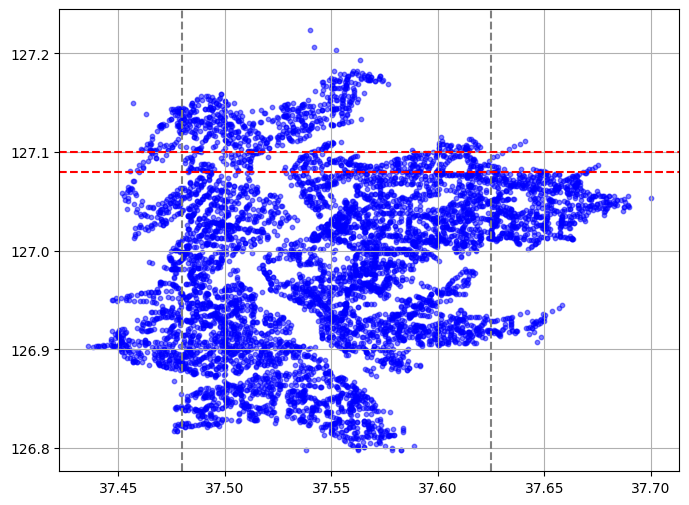

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(coords_km_cleaned['위도'], coords_km_cleaned['경도'], s=10, c='blue', alpha=0.5)
#plt.axhline(y=127.188, color='green', linestyle='--')  # 수평선
#plt.axvline(x=37.695, color='RED', linestyle='--')   # 수직선
#plt.axvline(x=37.446, color='red', linestyle='--')   # 수직선

#r같아봄
#plt.axvline(x=37.47, color='gray', linestyle='--')   # 수직선
#plt.axhline(y=127.132, color='green', linestyle='--')  # 수평선


# plt.axvline(x=37.623, color='gray', linestyle='--')   # 수직선
# plt.axhline(y=127.09, color='red', linestyle='--')  # 수평선

# plt.axvline(x=37.566, color='gray', linestyle='--')   # 수직선
# plt.axhline(y=126.807, color='red', linestyle='--')  # 수평선

plt.axvline(x=37.48, color='gray', linestyle='--')   # 수직선
plt.axhline(y=127.1, color='red', linestyle='--')  # 수평선

plt.axvline(x=37.625, color='gray', linestyle='--')   # 수직선
plt.axhline(y=127.08, color='red', linestyle='--')  # 수평선

plt.grid(True)
plt.show()


## 이상치 조회 코드 수정본

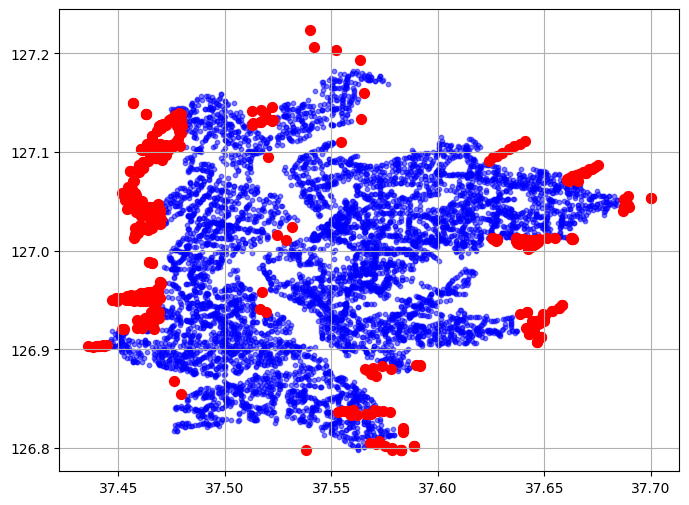


✅ 총 이상치 개수: 452


In [ ]:
# 조건 목록 (설명 없이)
conditions = [
    coords_km_cleaned[coords_km_cleaned['위도'] > 37.695],
    coords_km_cleaned[coords_km_cleaned['위도'] < 37.446],
    coords_km_cleaned[coords_km_cleaned['경도'] > 127.188],
    coords_km_cleaned[(coords_km_cleaned['위도'] < 37.47) & (coords_km_cleaned['경도'] > 127.132)],
    coords_km_cleaned[(coords_km_cleaned['위도'] > 37.623) & (coords_km_cleaned['경도'] > 127.09)],
    coords_km_cleaned[(coords_km_cleaned['위도'] > 37.566) & (coords_km_cleaned['경도'] < 126.807)],
    coords_km_cleaned[(coords_km_cleaned['위도'] < 37.55) & (coords_km_cleaned['경도'] < 126.805)],
    coords_km_cleaned[(coords_km_cleaned['위도'] < 37.47) & (coords_km_cleaned['경도'] > 126.92)],
    coords_km_cleaned[(coords_km_cleaned['위도'] > 37.66) & (coords_km_cleaned['경도'] > 127.07)],
    coords_km_cleaned[(coords_km_cleaned['위도'] > 37.653) & (coords_km_cleaned['경도'] < 127.0)],
    coords_km_cleaned[(coords_km_cleaned['위도'] > 37.64) & (coords_km_cleaned['경도'] < 126.92)],
    coords_km_cleaned[(coords_km_cleaned['위도'] > 37.582) & (coords_km_cleaned['경도'] < 126.84)],
    coords_km_cleaned[(coords_km_cleaned['위도'] > 37.64) & (coords_km_cleaned['경도'] < 126.95)],
    coords_km_cleaned[(coords_km_cleaned['위도'] > 37.588) & (coords_km_cleaned['경도'] < 126.89)],
    coords_km_cleaned[(coords_km_cleaned['경도'] > 126.832) & (coords_km_cleaned['경도'] < 126.839) & (coords_km_cleaned['위도'] > 37.552)],
    coords_km_cleaned[(coords_km_cleaned['경도'] > 126.93) & (coords_km_cleaned['경도'] < 126.95) & (coords_km_cleaned['위도'] > 37.636) & (coords_km_cleaned['위도'] < 37.646)],
    coords_km_cleaned[(coords_km_cleaned['경도'] > 126.85) & (coords_km_cleaned['경도'] < 126.87) & (coords_km_cleaned['위도'] > 37.47) & (coords_km_cleaned['위도'] < 37.48)],
    coords_km_cleaned[(coords_km_cleaned['경도'] > 127.12) & (coords_km_cleaned['경도'] < 127.17) & (coords_km_cleaned['위도'] > 37.563) & (coords_km_cleaned['위도'] < 37.57)],
    coords_km_cleaned[(coords_km_cleaned['경도'] > 127.09) & (coords_km_cleaned['경도'] < 127.1) & (coords_km_cleaned['위도'] > 37.518) & (coords_km_cleaned['위도'] < 37.53)],
    coords_km_cleaned[(coords_km_cleaned['경도'] > 127.1) & (coords_km_cleaned['경도'] < 127.12) & (coords_km_cleaned['위도'] > 37.553) & (coords_km_cleaned['위도'] < 37.56)],
    coords_km_cleaned[(coords_km_cleaned['경도'] > 126.98) & (coords_km_cleaned['경도'] < 127.0) & (coords_km_cleaned['위도'] > 37.46) & (coords_km_cleaned['위도'] < 37.47)],
    coords_km_cleaned[(coords_km_cleaned['경도'] > 126.87) & (coords_km_cleaned['경도'] < 126.885) & (coords_km_cleaned['위도'] > 37.56) & (coords_km_cleaned['위도'] < 37.578)],
    coords_km_cleaned[(coords_km_cleaned['경도'] > 126.935) & (coords_km_cleaned['경도'] < 126.96) & (coords_km_cleaned['위도'] > 37.516) & (coords_km_cleaned['위도'] < 37.52)],
    coords_km_cleaned[(coords_km_cleaned['경도'] > 127.01) & (coords_km_cleaned['경도'] < 127.025) & (coords_km_cleaned['위도'] > 37.523) & (coords_km_cleaned['위도'] < 37.53)],
    coords_km_cleaned[(coords_km_cleaned['경도'] > 127.017) & (coords_km_cleaned['경도'] < 127.026) & (coords_km_cleaned['위도'] > 37.53) & (coords_km_cleaned['위도'] < 37.537)],
    coords_km_cleaned[(coords_km_cleaned['경도'] > 127.125)  & (coords_km_cleaned['위도'] > 37.512) & (coords_km_cleaned['위도'] < 37.524)],
    coords_km_cleaned[(coords_km_cleaned['경도'] > 126.99)  & (coords_km_cleaned['경도'] < 127.013) & (coords_km_cleaned['위도'] > 37.625)],
    coords_km_cleaned[(coords_km_cleaned['경도'] < 127.1)  & (coords_km_cleaned['경도'] > 127.08) & (coords_km_cleaned['위도'] < 37.48)],
    coords_km_cleaned[(coords_km_cleaned['경도'] > 127.91)  & (coords_km_cleaned['경도'] < 127.14) & (coords_km_cleaned['위도'] < 37.48)],

    coords_km_cleaned[(coords_km_cleaned['위도'] > 37.686)],




]

# 전체 산점도
plt.figure(figsize=(8, 6))
plt.scatter(coords_km_cleaned['위도'], coords_km_cleaned['경도'], s=10, c='blue', alpha=0.5, label='정상 데이터')

# 이상치 표시 반복
for data in conditions:
    plt.scatter(data['위도'], data['경도'], s=50, c='red')

plt.grid(True)
plt.show()

# 이상치 값 출력 반복
total_outliers = 0
for i, data in enumerate(conditions, start=1):
    count = len(data)
    total_outliers += count
    # print(f"\n이상치 {i} (개수: {count})")
    # print(data[['위도', '경도']])

print(f"\n✅ 총 이상치 개수: {total_outliers}")


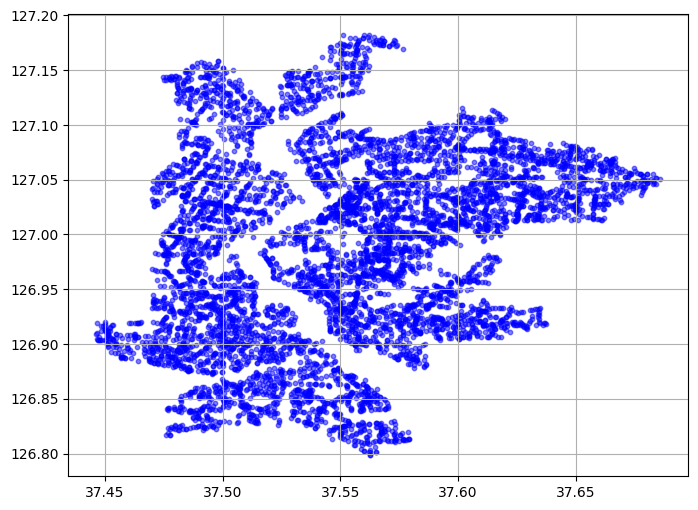

In [ ]:
# 이상치 인덱스 수집
outlier_indices = pd.Index([])  # 빈 인덱스 생성

for condition in conditions:
    outlier_indices = outlier_indices.union(condition.index)  # 인덱스 병합

# 이상치 제거한 데이터프레임
coords_km_cleaned2 = coords_km_cleaned.drop(index=outlier_indices).reset_index(drop=True)


plt.figure(figsize=(8, 6))
plt.scatter(coords_km_cleaned2['위도'], coords_km_cleaned2['경도'], s=10, c='blue', alpha=0.5, label='이상치 제거 후')
plt.grid(True)
plt.show()


In [ ]:
coords_km_cleaned2

,이름,위도,경도,type,클러스터
0,종로2가사거리,37.569806,126.987752,bus,376
1,창경궁.서울대학교병원,37.579433,126.996521,bus,779
2,명륜3가.성대입구,37.582580,126.998251,bus,439
3,종로2가.삼일교,37.568579,126.987613,bus,2111
4,혜화동로터리.여운형활동터,37.586243,127.001744,bus,1895
...,...,...,...,...,...
7066,암사,37.550127,127.127521,subway,550
7067,몽촌토성,37.517692,127.112740,subway,841
7068,석촌,37.505396,127.106995,subway,2312
7069,송파,37.499780,127.112120,subway,1054


In [ ]:
# 군집화 하기 전 최적의 k값 찾는 과정-실루엣계수
import pandas as pd
import numpy as np
import math
from sklearn.cluster import KMeans

file = coords_km_cleaned2

latitudes = file['위도'].to_numpy()
longitudes = file['경도'].to_numpy()
coords = np.vstack((latitudes, longitudes)).T

mean_lat = latitudes.mean()
lat_km = coords[:, 0] * 111.0
lon_km = coords[:, 1] * 111.0 * np.cos(np.radians(mean_lat))
coords_km = np.vstack((lat_km, lon_km)).T
coords_km

test=[]
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
for k in range(500,7000,500):
    k_model = KMeans(n_clusters=k, random_state=42)
    labels = k_model.fit_predict(coords_km)
    score = silhouette_score(coords_km, labels)
    test.append(score)
    print(k/10001*100)


4.999500049995
9.99900009999
14.998500149985
19.99800019998
24.997500249975
29.99700029997
34.996500349965004
39.99600039996
44.995500449955
49.99500049995
54.994500549945
59.99400059994
64.99350064993502


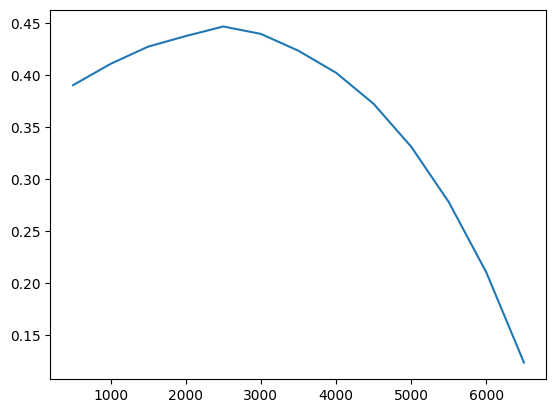

In [ ]:
plt.plot(range(500,7000, 500), test)

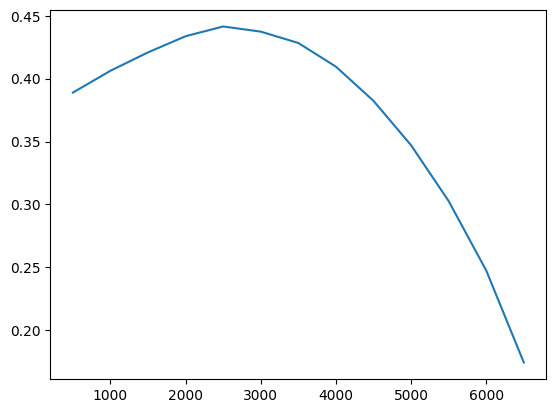

In [ ]:
plt.plot(range(500,7000, 500), test)